<a href="https://colab.research.google.com/github/Ayush-Barasker/Cats-and-dogs-classification-model/blob/main/cats_vs_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#first write these 2 commands as we will be directly gonna the download the dataset here as the dataset is very big and also the upload & then the extraction part will be difficult

In [ ]:
#firstly upload the json file which is nothing but the api token that has been downloaded from the kaggle cats vs dogs classification

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
#write the api command that has been copied from the dataset profile
#before that first add ! then copy the command

In [ ]:
#this is the command as - copy api command from the dataset to get the file here downloaded directly

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:08<00:00, 131MB/s]
100% 1.06G/1.06G [00:08<00:00, 128MB/s]


In [ ]:
#we have got the dataset directly downloaded here but the issue is that it is in zip mode so tp extract this we need to ply this code

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
#now as it as a fundamental model so we need just to make a cnn model and feed the dataset into it
#first we need to import the libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
#learn about generators

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
ab ye jo step h isme normal cpu se bhahut time lagega to hum runtime->change runtime ->gpu select kr lenge (top after the file option)

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 83s 108ms/step - loss: 1.4406 - accuracy: 0.5792 - val_loss: 0.6552 - val_accuracy: 0.6304
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.6174 - accuracy: 0.6513 - val_loss: 0.5917 - val_accuracy: 0.6428
Epoch 3/10
625/625 [==============================] - 68s 107ms/step - loss: 0.5499 - accuracy: 0.7042 - val_loss: 0.5538 - val_accuracy: 0.6972
Epoch 4/10
625/625 [==============================] - 66s 104ms/step - loss: 0.4851 - accuracy: 0.7501 - val_loss: 0.5354 - val_accuracy: 0.7260
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4401 - accuracy: 0.7730 - val_loss: 0.4446 - val_accuracy: 0.7776
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3860 - accuracy: 0.8092 - val_loss: 0.5671 - val_accuracy: 0.7642
Epoch 7/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3260 - accuracy: 0.8423 - val_loss: 0.4377 - val_ac

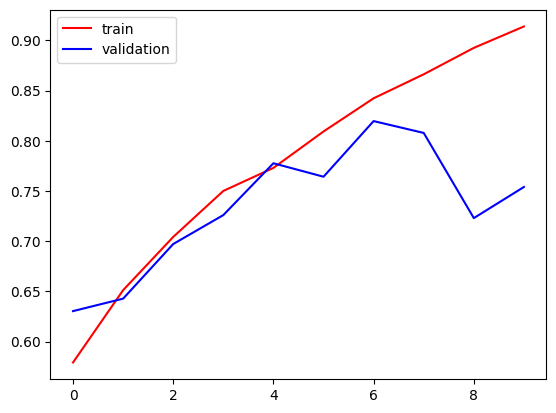

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

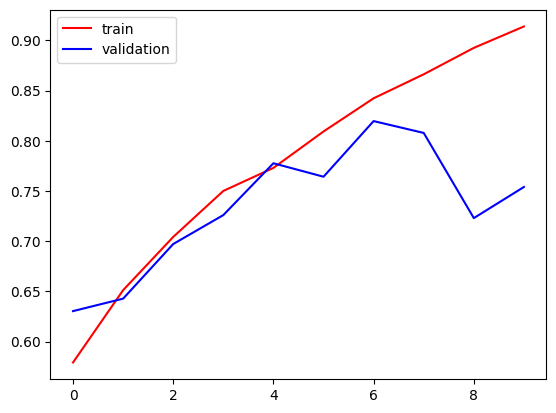

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

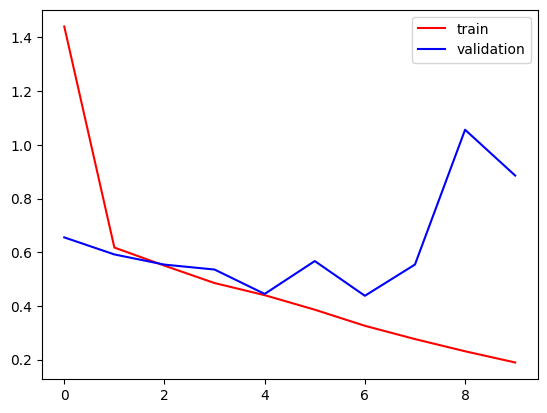

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

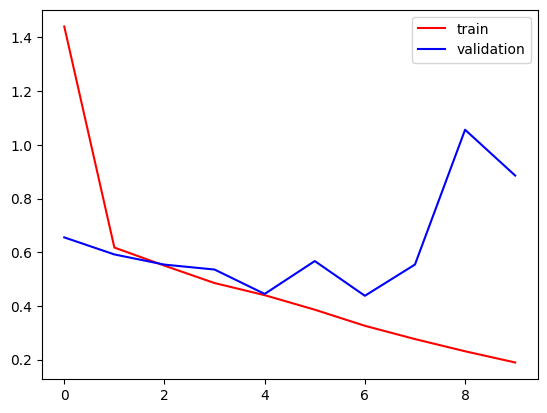

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/check_cat_2.jpg')

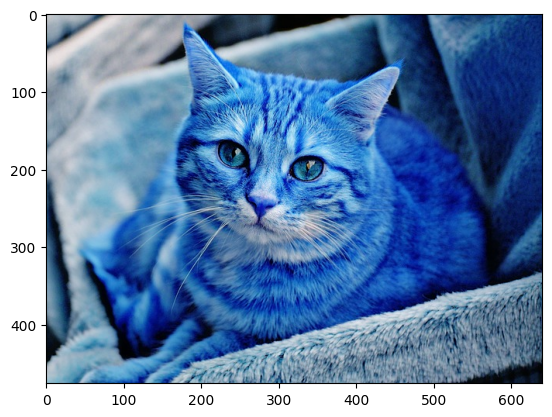

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(476, 640, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[0.]], dtype=float32)